# Plot Training Logs : CarRace-PPO 🏎️🏁🏆

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import json

##### Listing the available files

**Note** : Some of them will be labeled "continuous", they use the continuous model.

In [69]:
files = glob.glob('../models/PPO_CarRacing*_log.csv')
for no, file in enumerate(files):
    fname = file.replace('_', ' ')
    print(f"{no:2d} | {fname}")

 0 | ../models\PPO Carracing 24-08-09 15-41 log.csv
 1 | ../models\PPO Carracing 24-08-09 16-31 log.csv
 2 | ../models\PPO Carracing 24-08-09 16-44 log.csv


In [70]:
choice = -1 # Make your choice here

##### Printing the hyperparameters

In [71]:
continuous = False
print('Hyperparameters \n' + '-'*40)
with open(files[choice].replace('log.csv','prms.json')) as jfile:
    prms = json.load(jfile)
    for key, val in prms.items():
        print(f'{key:>30s} : {val}')

if 'continuous' in files[choice].lower():
    continuous = True

print(f'{"CONTINUOUS":>30s} : {continuous}')

Hyperparameters 
----------------------------------------
                     MAX_STEPS : 1000000
                        N_IMGS : 3
                        N_IDLE : 2
                  N_START_SKIP : 30
                         GAMMA : 0.95
                     N_FILTERS : 16
                  DROPOUT_RATE : 0
                      ACTOR_LR : 0.0005
                     CRITIC_LR : 0.001
                      L2_ALPHA : 0
            SCHEDULER_PATIENCE : 200
              SCHEDULER_MIN_LR : 1e-05
              SCHEDULER_FACTOR : 0.5
                   BUFFER_SIZE : 1000
                 UPDATE_EPOCHS : 7
                  ENTROPY_BETA : 0.001
                    CONTINUOUS : False


##### Plotting the data

In [72]:
df = pd.read_csv(files[choice])

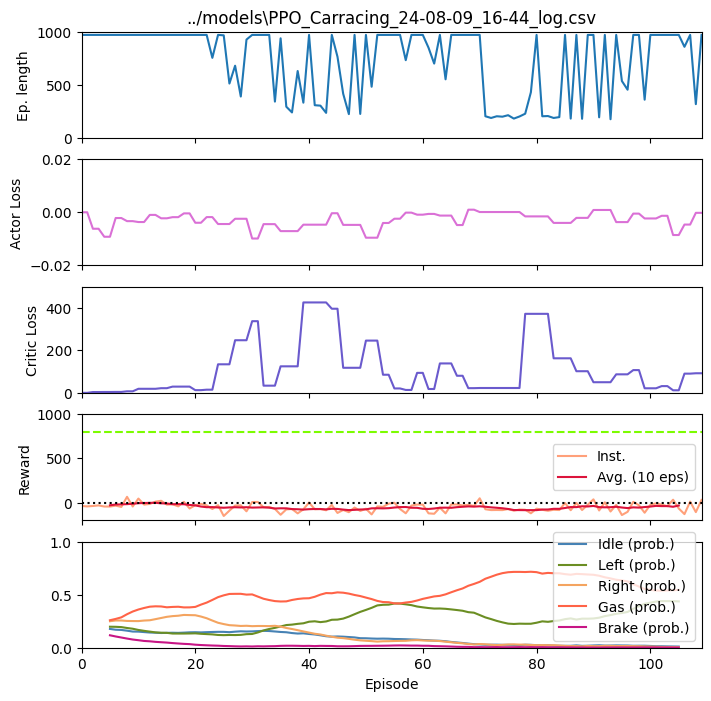

In [73]:
fig, axes = plt.subplots(nrows=5, sharex=True, figsize=[8,8])

axes[0].plot(df['episode'], df['step'])
axes[1].plot(df['episode'], df['a_loss'], color='orchid')
axes[2].plot(df['episode'], df['c_loss'], color='slateblue')
axes[3].plot(df['episode'], df['cum_reward'], color='lightsalmon', label='Inst.')
axes[3].plot(df['episode'], df['cum_reward'].rolling(10, center=True).mean(), color='crimson', label='Avg. (10 eps)')

if continuous: 
    axes[4].plot(df['episode'], df['action_0'].rolling(10, center=True).mean(), color='steelblue', label='Main Engine (avg)')
    axes[4].plot(df['episode'], df['action_1'].rolling(10, center=True).mean(), color='tomato', label='Side Engine (avg)')
    axes[4].set_ylim([-2,2])
else:
    axes[4].plot(df['episode'], df['action_0'].rolling(10, center=True).mean(), color='steelblue', label='Idle (prob.)')
    axes[4].plot(df['episode'], df['action_1'].rolling(10, center=True).mean(), color='olivedrab', label='Left (prob.)')
    axes[4].plot(df['episode'], df['action_2'].rolling(10, center=True).mean(), color='sandybrown', label='Right (prob.)')
    axes[4].plot(df['episode'], df['action_3'].rolling(10, center=True).mean(), color='tomato', label='Gas (prob.)')
    axes[4].plot(df['episode'], df['action_4'].rolling(10, center=True).mean(), color='mediumvioletred', label='Brake (prob.)')
    axes[4].set_ylim([0,1])

# Formatting
axes[3].plot(df['episode'], np.zeros_like(df['cum_reward']), 'k:')
axes[3].plot(df['episode'], 800 * np.ones_like(df['cum_reward']), '--', color='lawngreen')
axes[0].set_ylabel('Ep. length')
axes[1].set_ylabel('Actor Loss')
axes[2].set_ylabel('Critic Loss')
axes[3].set_ylabel('Reward')
axes[3].legend()
axes[4].legend()

axes[0].set_ylim([0, 1000])
axes[1].set_ylim([-0.02,0.02])
axes[2].set_ylim([0,500])
axes[3].set_ylim([-200,1000])

axes[0].set_title(files[choice])
axes[4].set_xlim([0, df['episode'].max()])
axes[4].set_xlabel('Episode')


fig.savefig(files[choice].replace('log.csv','fig.png'))